# Importing the dependencies and creating the dataframe

In [13]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [15]:
df = pd.read_csv("segmentation+data.csv")

In [17]:
df.columns

Index(['ID', 'Gender', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [19]:
df.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [23]:
df = df.drop(columns= ['ID'])

In [25]:
df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,male,single,67,university,124670,skilled employee / official,big city
1,female,married,22,high school,150773,skilled employee / official,big city
2,male,single,49,high school,89210,unemployed/ unskilled,small city
3,male,single,45,high school,171565,skilled employee / official,mid-sized city
4,male,single,53,high school,149031,skilled employee / official,mid-sized city


# Preprocessing the data 

In [28]:
# encoding the gender values as 1 being the female 0 being male
df['Gender'] = df['Gender'].map({'female': 1, 'male': 0})
df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,single,67,university,124670,skilled employee / official,big city
1,1,married,22,high school,150773,skilled employee / official,big city
2,0,single,49,high school,89210,unemployed/ unskilled,small city
3,0,single,45,high school,171565,skilled employee / official,mid-sized city
4,0,single,53,high school,149031,skilled employee / official,mid-sized city


In [30]:
# encoding the Marital status values as 0 being single 1 being married
df['Marital status'] = df['Marital status'].map({'single': 0, 'married': 1})

In [32]:
df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,university,124670,skilled employee / official,big city
1,1,1,22,high school,150773,skilled employee / official,big city
2,0,0,49,high school,89210,unemployed/ unskilled,small city
3,0,0,45,high school,171565,skilled employee / official,mid-sized city
4,0,0,53,high school,149031,skilled employee / official,mid-sized city


In [33]:
# encoding the education columns as the following order:
# "other / unknown" = 0 , "high school" =1 , "university" =2 , "graduate school" = 3

education_order = [["other / unknown", "high school", "university", "graduate school"]]
ordinal_encoding = OrdinalEncoder(categories = education_order)
df['Education'] = ordinal_encoding.fit_transform(df[['Education']])

In [34]:
df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2.0,124670,skilled employee / official,big city
1,1,1,22,1.0,150773,skilled employee / official,big city
2,0,0,49,1.0,89210,unemployed/ unskilled,small city
3,0,0,45,1.0,171565,skilled employee / official,mid-sized city
4,0,0,53,1.0,149031,skilled employee / official,mid-sized city


In [35]:
# Encoding Ordinal data for the Settlement city size
cities = [['small city', 'mid-sized city','big city']]
encoding = OrdinalEncoder(categories = cities)
df["Settlement size"] = encoding.fit_transform(df[["Settlement size"]]) 

In [36]:
df.head(20)

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2.0,124670,skilled employee / official,2.0
1,1,1,22,1.0,150773,skilled employee / official,2.0
2,0,0,49,1.0,89210,unemployed/ unskilled,0.0
3,0,0,45,1.0,171565,skilled employee / official,1.0
4,0,0,53,1.0,149031,skilled employee / official,1.0
5,0,0,35,1.0,144848,unemployed/ unskilled,0.0
6,0,0,53,1.0,156495,skilled employee / official,1.0
7,0,0,35,1.0,193621,management/ self employed/ highly qualified em...,1.0
8,0,1,61,2.0,151591,unemployed/ unskilled,0.0
9,0,1,28,1.0,174646,management/ self employed/ highly qualified em...,0.0


In [37]:
# Encoding Ordinal data for the occupation the order is following :  
# unemployed/ unskilled = 0 , skilled employee/ offical = 1 ,management/ self-employed/ higly qualified employee/ officer = 2
occup = [[ 'unemployed/ unskilled', 'skilled employee / official','management/ self employed/ highly qualified employee/ officer']]
enc = OrdinalEncoder(categories=occup)
df["Occupation"] = enc.fit_transform(df[["Occupation"]])

In [38]:
df[["Education", "Occupation","Income", "Settlement size"]] = df[["Education", "Occupation","Income", "Settlement size"]].astype(int)

In [39]:
df.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


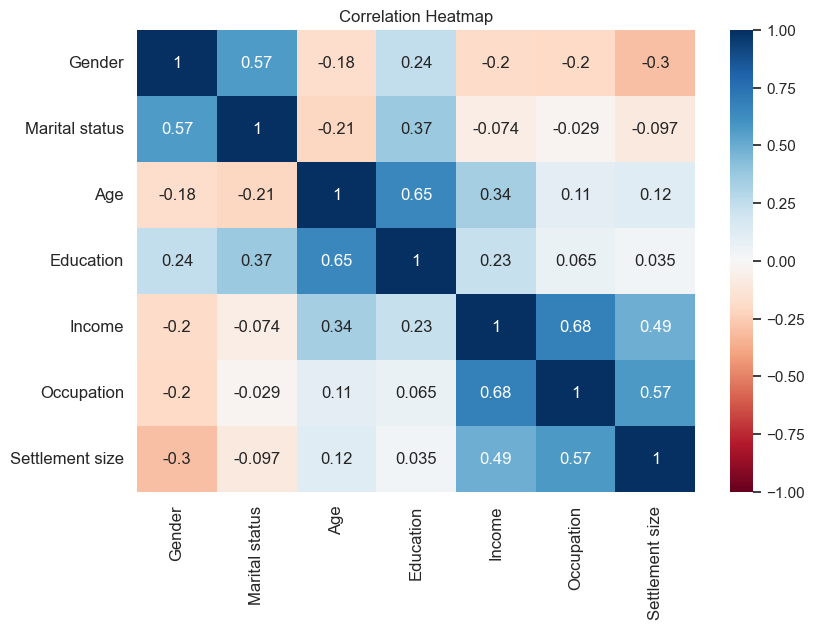

In [40]:
plt.figure(figsize = (9, 6))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# scaling the data to (0,1) range 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [42]:
scaled_data = pd.DataFrame(scaled_data, columns= ['Gender', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'])

In [45]:
scaled_data.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


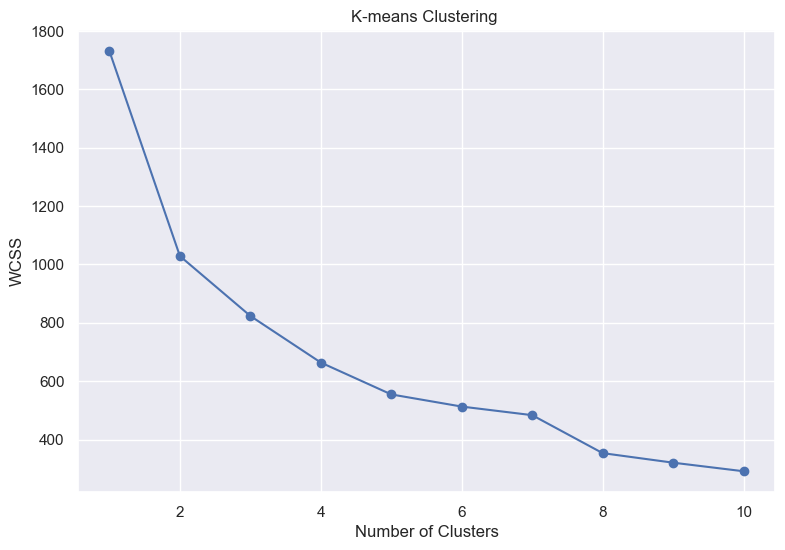

In [47]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize = (9,6))
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering ')
plt.show()

# PCA

In [49]:
pca = PCA()

In [52]:
pca.fit(scaled_data)

PCA()

In [63]:
pca.explained_variance_ratio_

array([0.48324689, 0.24823223, 0.11210423, 0.07713658, 0.06243603,
       0.00950565, 0.00733839])

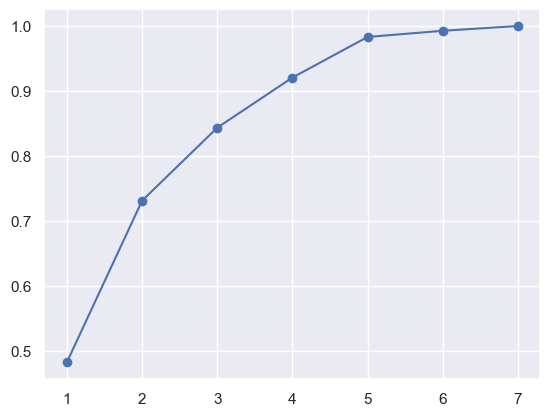

In [65]:
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o')

In [66]:
pca = PCA(n_components=4)

In [67]:
pca.fit(scaled_data)

PCA(n_components=4)

In [68]:
pca.components_

array([[ 0.68655909,  0.64505047, -0.07470905,  0.09813024, -0.06168713,
        -0.14848014, -0.26736468],
       [-0.01093666,  0.42702162,  0.03787179,  0.12555358,  0.17594659,
         0.50873955,  0.71453609],
       [ 0.72461879, -0.61429616,  0.05879817, -0.03237187,  0.07367801,
         0.18694029,  0.22953768],
       [-0.03059583, -0.04152853,  0.70832922,  0.64191869,  0.16479738,
         0.08005815, -0.22356633]])

In [69]:
pca_df = pd.DataFrame(data = pca.components_ , columns = ['Gender', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'], index=['Component 1', 'Component 2', 'Component 3', 'Component 4'] )

In [75]:
pca_df

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,0.686559,0.645050,-0.074709,0.098130,-0.061687,-0.148480,-0.267365
Component 2,-0.010937,0.427022,0.037872,0.125554,0.175947,0.508740,0.714536
Component 3,0.724619,-0.614296,0.058798,-0.032372,0.073678,0.186940,0.229538
Component 4,-0.030596,-0.041529,0.708329,0.641919,0.164797,0.080058,-0.223566


([<matplotlib.axis.YTick at 0x27152692ea0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

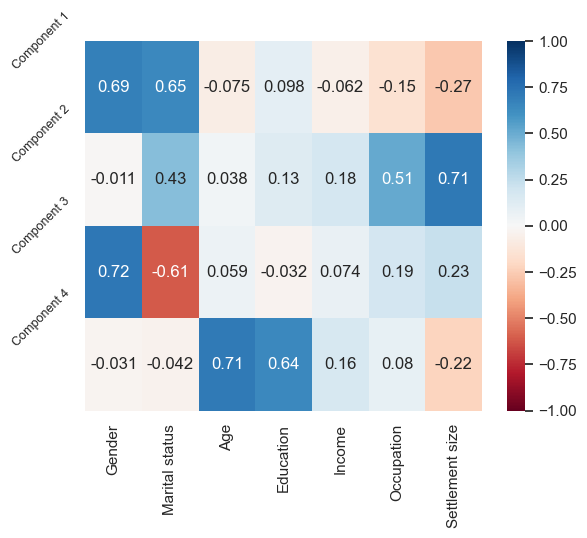

In [77]:
sns.heatmap(pca_df, 
            vmin=-1, 
            vmax=1, 
            cmap='RdBu', 
            annot=True)

# Update yticks to include all 4 components
plt.yticks([0, 1, 2, 3], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4'], 
           rotation=45, 
           fontsize=9)

In [79]:
pca.transform(scaled_data)
scores_pca = pca.transform(scaled_data)

# Creating the model 

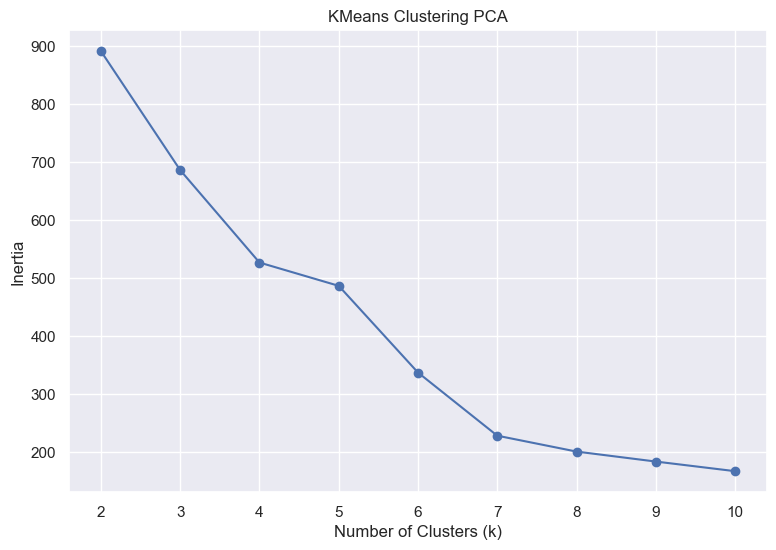

In [82]:
max_k = 10
inertia = []
k_values = range(2, max_k + 1)

# Loop through different values of k
for k in k_values:
        
        model = KMeans(n_clusters= k , random_state=42, max_iter=1000)
        cluster_labels  = model.fit(scores_pca)
        inertia.append(model.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Clustering PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

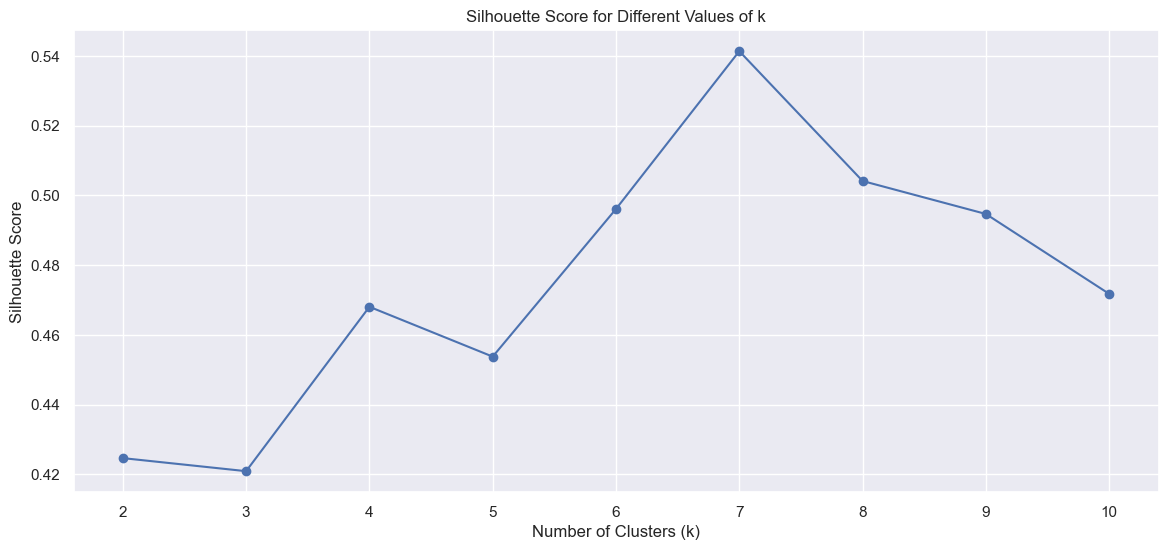

In [83]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = model.fit_predict(scores_pca)
    silhouette_avg.append(silhouette_score(scores_pca, cluster_labels))

plt.figure(figsize=(14, 6))
plt.plot(k_values, silhouette_avg, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [84]:
model = KMeans(n_clusters = 4
               , random_state=42 , max_iter=1000)
cluster_labels = model.fit_predict(scores_pca)
cluster_labels

array([0, 1, 0, ..., 0, 1, 0])

# Results

In [86]:
df_clustered = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_clustered.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Components 4']
df_clustered['Segment K-means'] = cluster_labels
df_clustered.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Components 4,Segment K-means
0,0,0,67,2,124670,1,2,-0.826086,0.354652,0.158422,0.489010,0
1,1,1,22,1,150773,1,2,0.524891,0.716293,0.240947,-0.330927,1
2,0,0,49,1,89210,0,0,-0.486009,-0.690668,-0.181594,0.217384,0
3,0,0,45,1,171565,1,1,-0.707351,-0.028668,0.044773,0.146397,0
4,0,0,53,1,149031,1,1,-0.712574,-0.037939,0.046813,0.230521,0


In [87]:
df_clustered_freq = df_clustered.groupby(['Segment K-means']).mean()

In [88]:
df_clustered_freq.describe()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Components 4
count,4.00000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.50000,0.50000,35.348380,1.063351,116669.737532,0.743528,0.634424,0.053249,-0.055434,0.008751,0.003544
std,0.57735,0.57735,2.617701,0.240411,13504.044722,0.263978,0.415288,0.588163,0.394088,0.485937,0.009981
min,0.00000,0.00000,33.192935,0.790109,97997.241573,0.370787,0.073034,-0.688622,-0.587410,-0.612252,-0.009211
25%,0.00000,0.00000,33.774887,0.896965,111830.934714,0.649082,0.445229,-0.181544,-0.218195,-0.137874,0.000273
50%,0.50000,0.50000,34.557470,1.097406,119709.444748,0.834736,0.743791,0.082200,0.020279,0.036070,0.004123
75%,1.00000,1.00000,36.130962,1.263792,124548.247566,0.929181,0.932986,0.316993,0.183040,0.182694,0.007394
max,1.00000,1.00000,39.085645,1.268482,129262.819059,0.933852,0.977081,0.737219,0.325114,0.575114,0.015143


In [89]:
df_clustered_freq.head()

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Components 4
Segment K-means,,,,,,,,,,,
0,0.0,0.0,39.085645,0.790109,129262.819059,0.927624,0.977081,-0.688622,-0.095123,0.020252,0.003435
1,1.0,1.0,33.192935,1.262228,116442.165761,0.741848,0.569293,0.737219,0.135681,0.051888,-0.009211
2,0.0,1.0,33.968872,1.268482,122976.723735,0.933852,0.918288,-0.012518,0.325114,-0.612252,0.004810
3,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034,0.176918,-0.587410,0.575114,0.015143


In [90]:
df_clustered_freq['Number of clusters'] = df_clustered[['Segment K-means','Gender']].groupby(['Segment K-means']).count()
df_clustered_freq['% of clusters'] = df_clustered_freq['Number of clusters'] / df_clustered_freq['Number of clusters'].sum()
df_clustered_freq = df_clustered_freq.rename({0:'Career focused', 
                                              1:'Standard',
                                              2:'Fewer-Opurtunities', 
                                              3:'Well-Off'})
df_clustered_freq

,Gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Components 4,Number of clusters,% of clusters
Segment K-means,,,,,,,,,,,,,
Career focused,0.0,0.0,39.085645,0.790109,129262.819059,0.927624,0.977081,-0.688622,-0.095123,0.020252,0.003435,829,0.4145
Standard,1.0,1.0,33.192935,1.262228,116442.165761,0.741848,0.569293,0.737219,0.135681,0.051888,-0.009211,736,0.3680
Fewer-Opurtunities,0.0,1.0,33.968872,1.268482,122976.723735,0.933852,0.918288,-0.012518,0.325114,-0.612252,0.004810,257,0.1285
Well-Off,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034,0.176918,-0.587410,0.575114,0.015143,178,0.0890


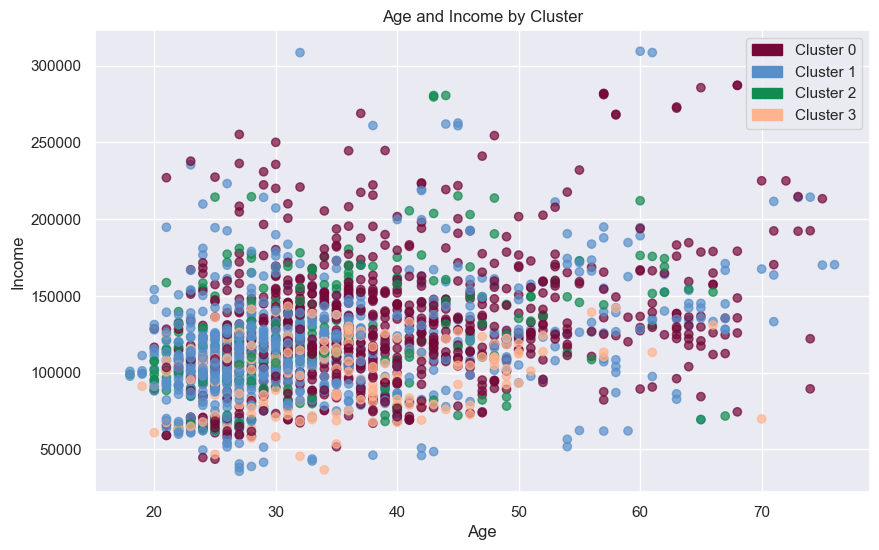

In [91]:
import matplotlib.pyplot as plt

cluster_colors = {0: '#740938', 1: '#578FCA', 2: '#118B50', 3: '#FFB38E'} 

# Mapping each row's cluster value to its corresponding color
colors = df_clustered["Segment K-means"].map(cluster_colors)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clustered["Age"], 
            df_clustered["Income"], 
            c=colors,  # Assign colors based on the cluster mapping
            alpha=0.7)  # Adjust transparency if needed

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and Income by Cluster")

# Add a legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
plt.legend(handles=legend_patches)

plt.show()


(array([829.,   0.,   0., 736.,   0.,   0., 257.,   0.,   0., 178.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

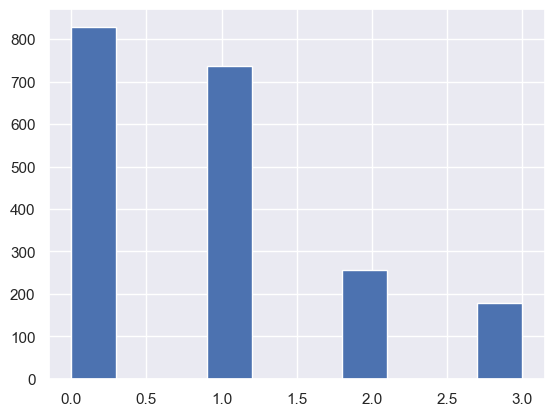

In [93]:
plt.hist(df_clustered["Segment K-means"])

# Export the model 

In [103]:
pickle.dump(scaler, open('scaler.pickle', 'wb' ))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(model, open('model.pickle','wb'))